# SIR Modelling
## Nhật ký
- Lên ý tưởng :
    - làm về covid - có những hướng gì trong hiện tại : so sánh với các bệnh dịch cũ (cúm heo, cúm gà, cúm Spanish 1918) (literature review), dự đoán tình hình covid sẽ như thế nào cho thời gian tới, giữa việc có social-distancing và không có sẽ ảnh hưởng như thế nào tới tình phát triển bệnh dịch.
- Phương pháp thực hiện nghiên cứu :
    - Ý tưởng là muốn chứng minh việc có social-distancing sẽ tốt cho xã hội trong iệc giảm số lượng người chết và tạo 1 koảng thời gian giảm sốc cho cơ sở hạ tầng bắt nhịp cùng với dịch bệnh.
    - Liên tưởng tới iệc so sánh
        - Dữ liệu của các nước có vs các nước ko có social-distancing (Ý, Mỹ so với Nhật Bản, Hàn Quốc)

## Ý nghĩa đạo hàm
- 

## Mô hình và tham số
- Mô hình SIR là một trong những mô hình toán học đơn giản nhất để phân tích, dự đoán cho những bệnh truyền nhiễm. Ý tưởng của mô hình là chia quần thể (population) thành các nhóm (compartments) riêng biệt tương ứng với từng giai đoạn của bệnh. Sau đó chúng ta phân tích những sự trao đổi các cá thể của những compartments riêng biệt này
- Tên của mô hình SIR có ý nghĩa của 3 compartments
    - S : Susceptible - phần dân số có khả năng nhiễm bệnh.
    - I : Infected - phần dân số đã nhiễm bệnh.
    - R : Recovered and have immunity + fatal - phần dân số đã hồi phục và miễn dịch cộng với phần dân số tử vong
    - Chú ý mỗi compartment là một biến theo thời gian $S(t),I(t),R(t)$
- Mô hình SIR có những tham số liên quan sau:
    - $\beta$ : tham số thể hiện các tiếp xúc lây nhiễm thành công của 1 cá thể nhiễm bệnh (Infected) và các thể chưa nhiễm bệnh (Susceptible) trên một đơn vị thời gian. 
    - $\gamma$ : tham số thể hiện tỉ lệ hồi phục trên trung bình. Chú ý $\frac{1}{\gamma}$ là khoảng thời gian một cá thể nhiễm bệnh hồi phục.

## Sự phân hóa thay đổi trong mỗi nhóm
- Phương trình vi phân mô hình hóa sự thay đổi số lượng cá thể trong mỗi compartment:

\begin{align}
\frac{dS}{dt} &= -\frac{\beta SI}{N} \\
\frac{dI}{dt} &= \frac{\beta SI}{N} - \gamma I\\
\frac{dR}{dt} &= \gamma I
\end{align}
- Vì tổng dân số là $N = S(t) + I(t) + R(t)$ nên chúng ta thấy được tổng các thay đổi trong các compartment được bảo toàn
\begin{equation}
\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt} = 0
\end{equation}

## Hệ số lây nhiễm cơ bản
- Đại lượng đặc biệt $R_o$ được gọi là hệ số lây nhiễm cơ bản được định nghĩa bởi
\begin{equation}
    R_o = \frac{\beta}{\gamma}
\end{equation}
- Chúng ta thay hệ số này vào phương trình của $\frac{dI}{dt}$, ta được
\begin{equation}
    \frac{dI}{dt} = \frac{\beta SI \gamma}{N \gamma} - \gamma I = (R_o \frac{S}{N}-1)\gamma I
\end{equation}
- Chú ý rằng khi thời giam $t=0$ tức chưa xảy ra dịch bệnh thì $S(0) = N$, chúng ta phân tích tại thời điểm $t=0$, nếu
\begin{equation}
    R_o > \frac{N}{S(0)} = 1 \longrightarrow \frac{dI}{dt} > 0
\end{equation}
- Ý nghĩa của tham số $\frac{dI}{dt}$ biểu hiện cho sự thay đổi (tăng giảm) của nhóm bị nhiễm bệnh qua thời gian, vậy nếu ngay từ thời gian bắt đầu $\frac{dI}{dt}(0)>0$ thì bệnh dịch tất nhiên sẽ xảy ra. Ngược lại, nếu tham số đó tại $t = 0$ là âm, thì bệnh dịch sẽ không lây lan. 

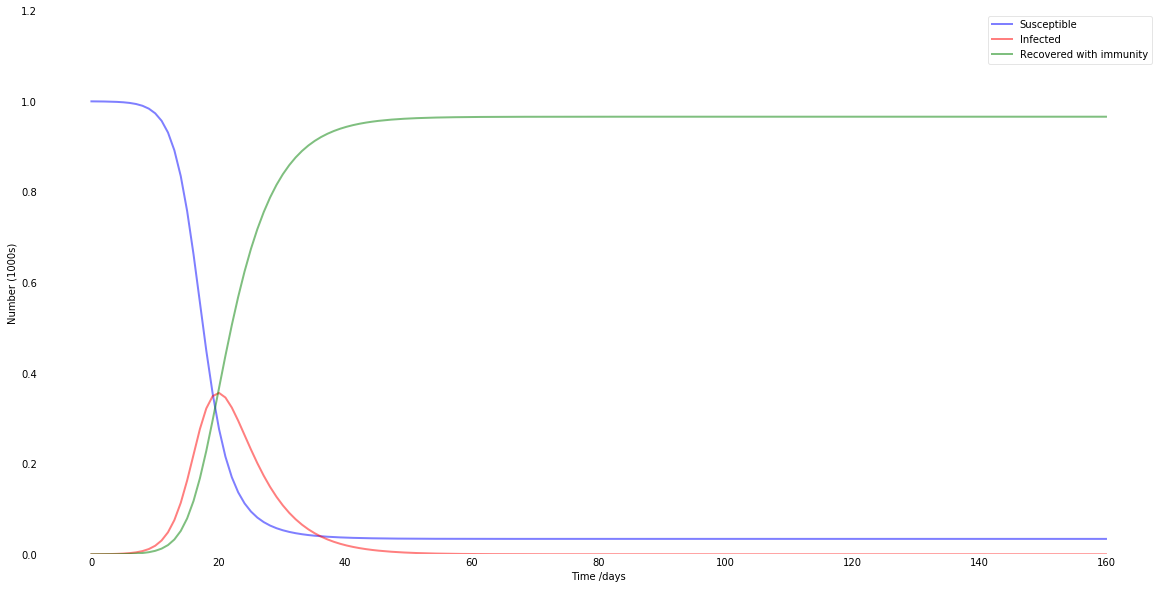

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 7800
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.7, 0.2 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

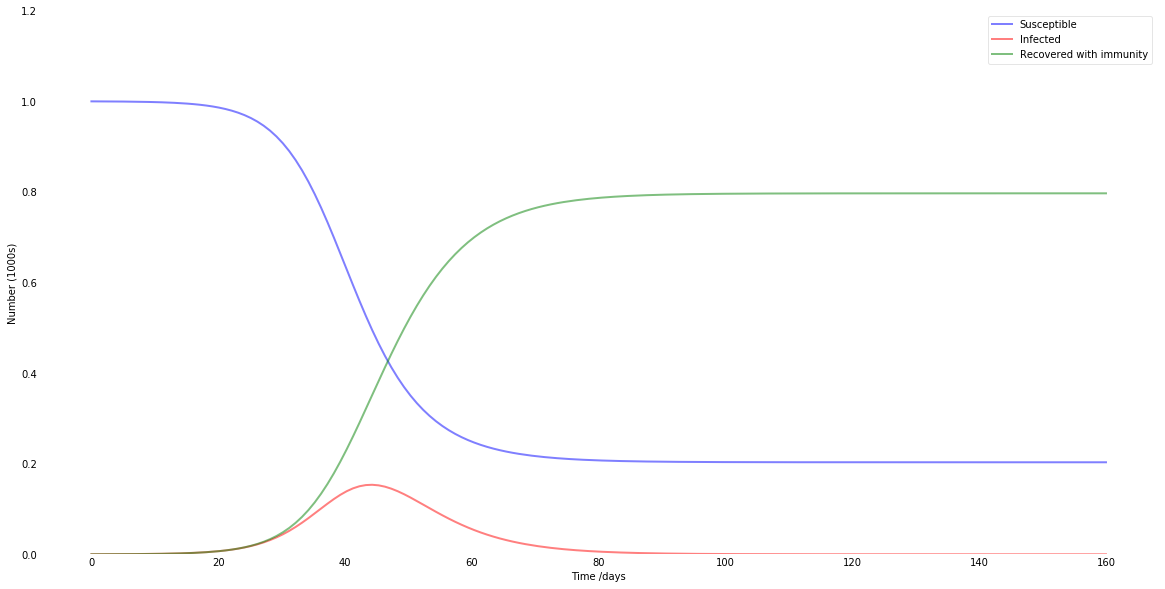

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 7800
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 0.2
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()